In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
df = pd.read_csv("diamonds.csv", index_col="Unnamed: 0")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


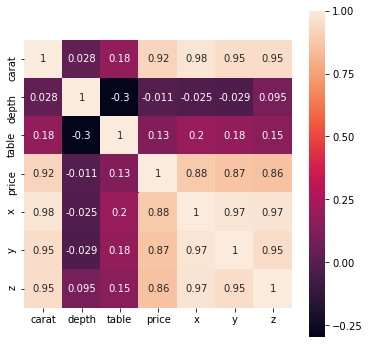

In [5]:
plt.figure(figsize=(6,6))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [6]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [8]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [9]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


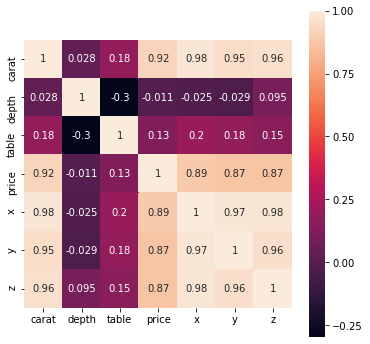

In [10]:
plt.figure(figsize=(6,6))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

C:\Users\Herlambang\anaconda3\envs\data_science_course\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Herlambang\anaconda3\envs\data_science_course\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

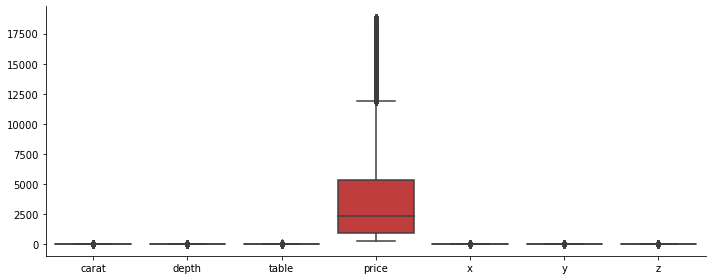

In [13]:
plt.figure(figsize=(6,6))
sns.factorplot(data=df , kind='box' , size=4, aspect=2.5)

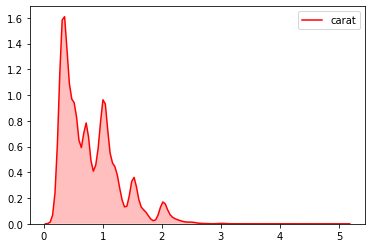

In [14]:
sns.kdeplot(df['carat'], shade=True , color='r')

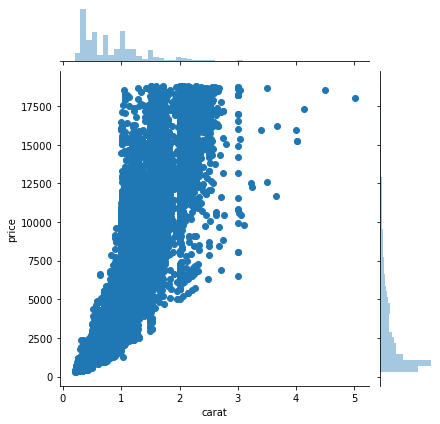

In [35]:
sns.jointplot(x='carat' , y='price' , data=df)

# Cut

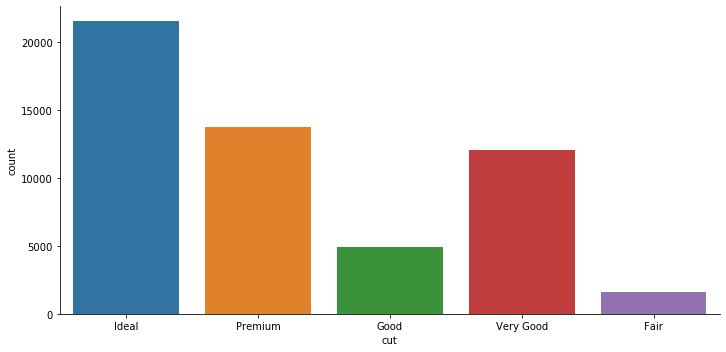

In [32]:
sns.factorplot(x='cut', data=df, kind='count', aspect=2)

C:\Users\Herlambang\anaconda3\envs\data_science_course\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


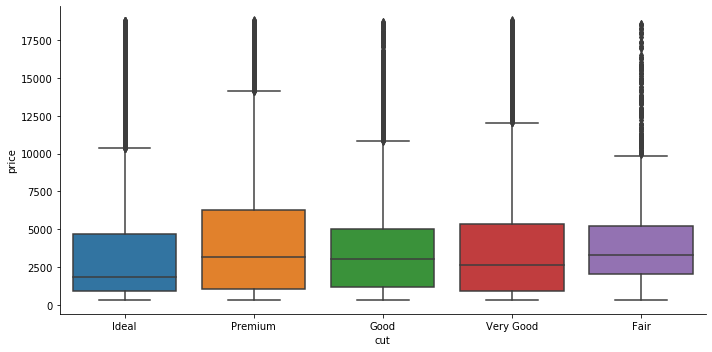

In [46]:
sns.factorplot(x='cut', y='price', data=df, kind='box', aspect = 2)

# Color

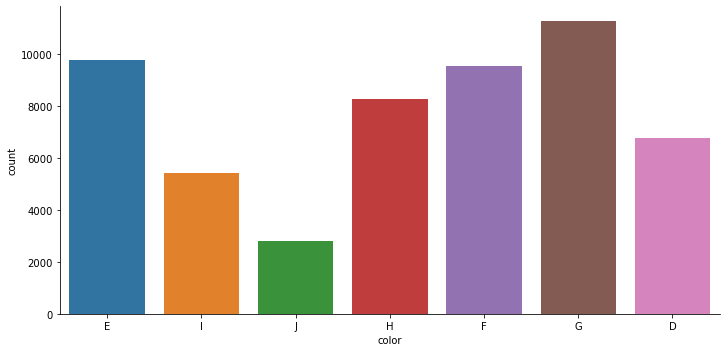

In [41]:
sns.factorplot(x='color', data=df, kind='count',aspect=2)

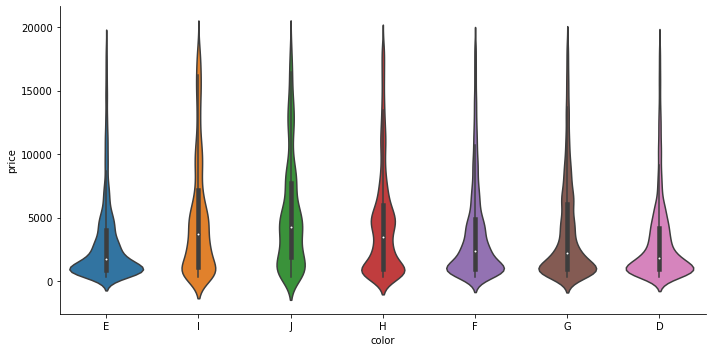

In [40]:
sns.factorplot(x='color', y='price', data=df , kind='violin', aspect=2)

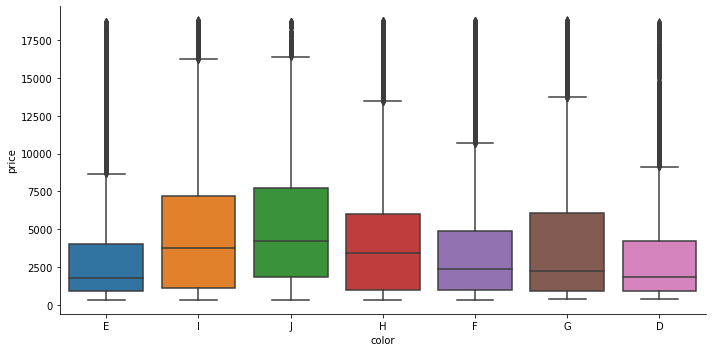

In [60]:
sns.factorplot(x='color', y='price', data=df , kind='box', aspect=2)

# Clarity

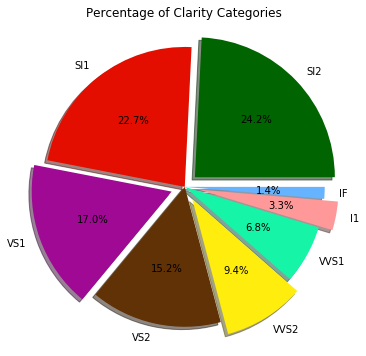

In [43]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

C:\Users\Herlambang\anaconda3\envs\data_science_course\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


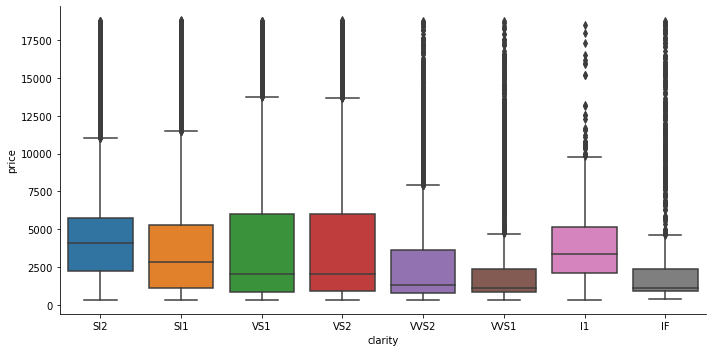

In [52]:
sns.factorplot(x='clarity', y='price', data=df, kind='box', aspect = 2);

# Depth

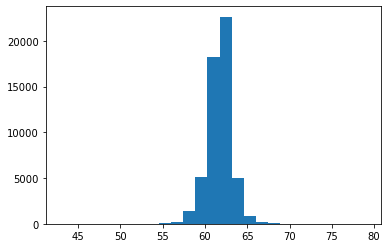

In [51]:
plt.hist('depth' , data=df , bins=25);

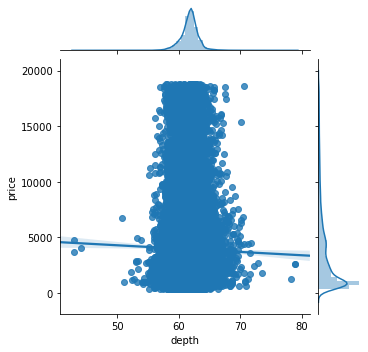

In [58]:
sns.jointplot(x='depth', y='price' , data=df , kind='regplot', size=5)

# Table

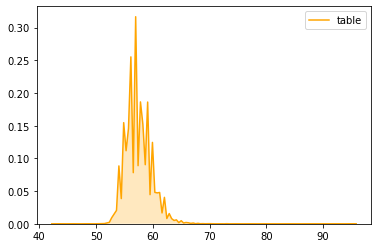

In [54]:
sns.kdeplot(df['table'] ,shade=True , color='orange')

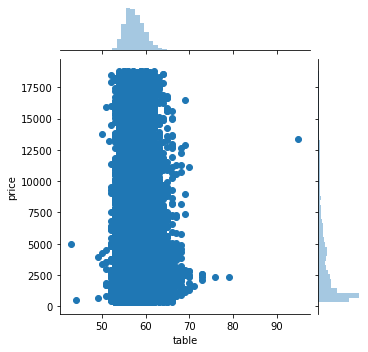

In [55]:
sns.jointplot(x='table', y='price', data=df , size=5)

# Dimensions

(2, 10)

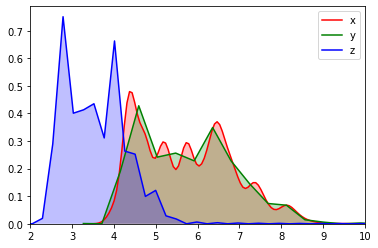

In [56]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

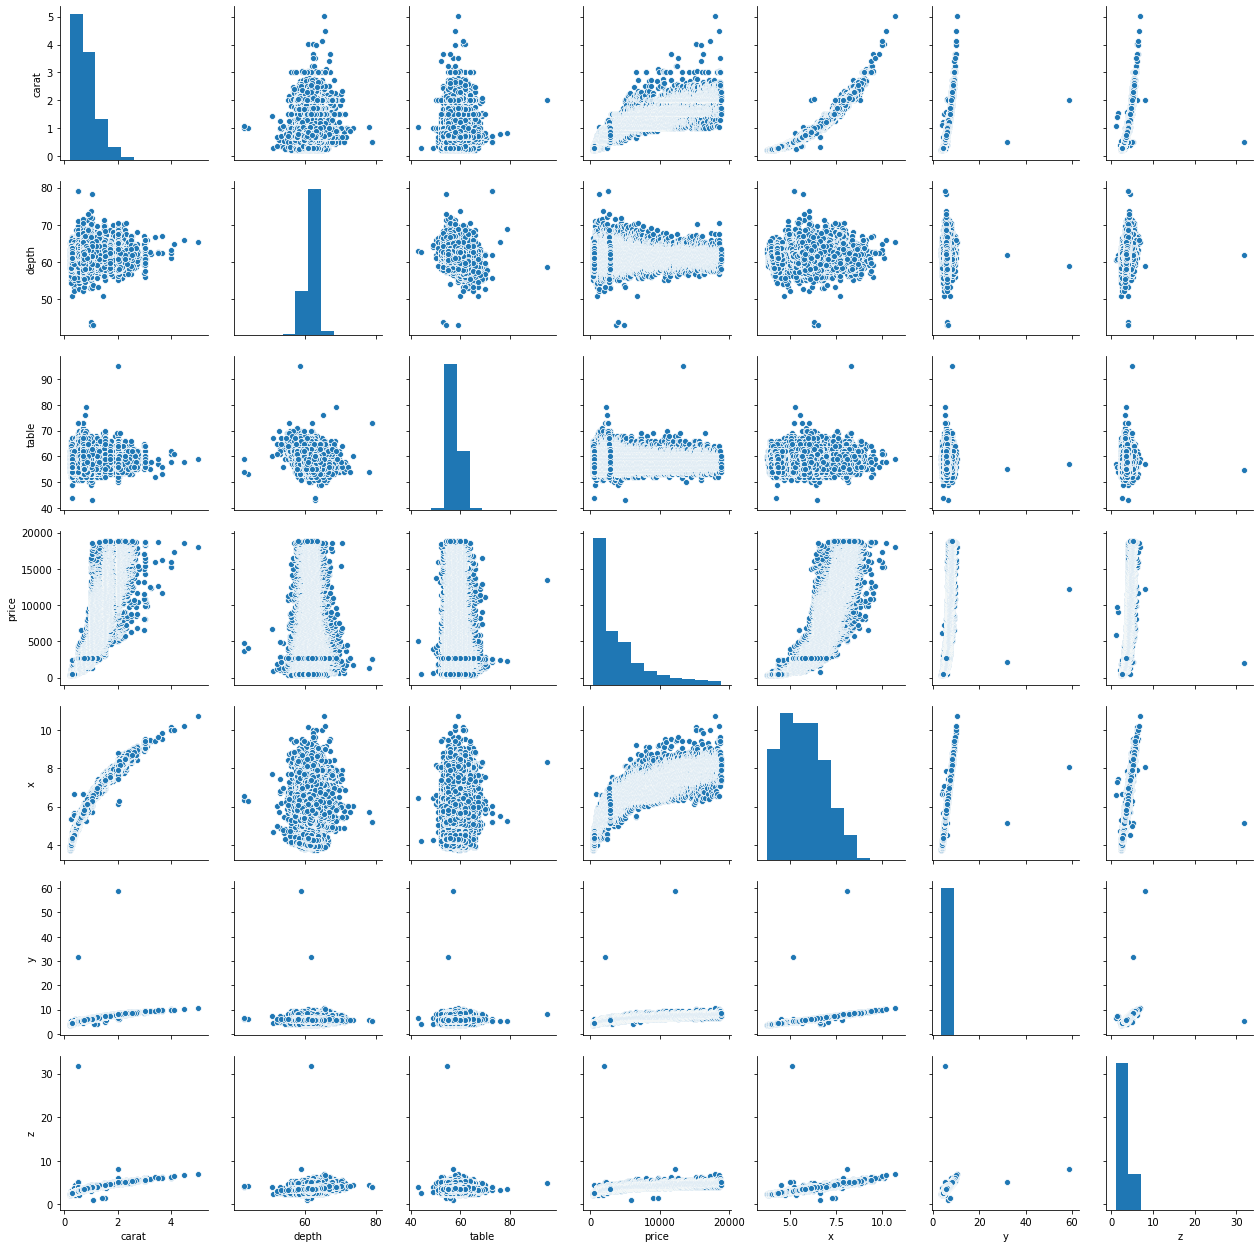

In [57]:
sns.pairplot(df)